# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [20]:
# Import of Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Functions File
import Functions as fn
import time

start_time = time.time()

# Import of Excel Data
(General Format of Excel must be Headers followed by columns of Data)

In [21]:
# Reading the excel file and set it as a Dataframe
df = pd.read_excel("Sample.xlsx")

## Creating Scenarios based on Historic Data
Calculation of Driftrate Mu and Standart Deviation Sigma with Historic Data


In [22]:
# Assign Variables with a specific Vector of the Dataframe
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
# Percentage Change excluding the Outliners
Percentage_Change1 = np.array(df.iloc[:, 5])

# Caluclation of the Estimated Percentage Drift Rate Mu:
mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
# Caluclation of the Estimated Percentage Standart Deviation Sigma:
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


### (Inputs) Definition for Scenarios 

In [23]:
# Demand at t0
# Dt0 = 22561132
Dt0 = Historic_Demand[-1]
# Steptime in Years
dt = 1
# Time Horizon of Forecasts in Steptime
Fth = 50
# Number of Forecasts
Forecasts = 5000

Creating a Defined Number of Forecasts and Plotting them

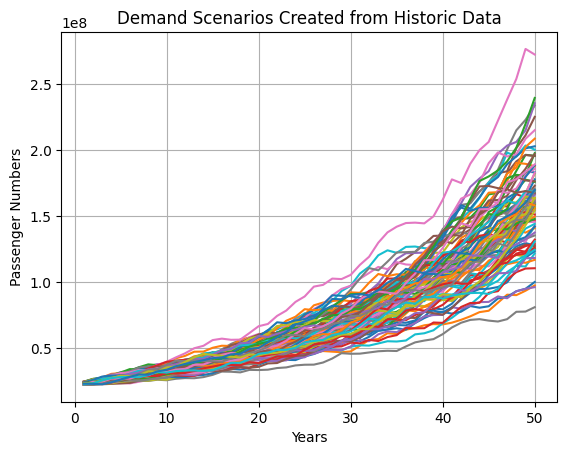

<Figure size 640x480 with 0 Axes>

In [24]:
# Calling the Scenario Creation Function
Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)
# Calling the Scenario Plotting Function
fn.Scenario_plot(Scenario, Fth, True, "Demand Scenarios Created from Historic Data")

# Assinging the Scenario as Demand
D = Scenario
# Rounding the Demand for further Calculations
D_rounded = np.ceil(D / 1000000)

## Exporting Data
Mainly used for Programming and Cross Checking with Excel

In [25]:
# Add initial Value for the Export
df_export = np.hstack((Dt0 * np.ones((D.shape[0], 1)), D))
# Change the shape to an Pandas Data Frame
df_export_2 = pd.DataFrame(df_export)
# Define Export File Name (if not found in Files a new one is created)
excel_file = "output.xlsx"
# Fill the Data Frame into the Excel File
df_export_2.to_excel(excel_file, index=False)

## Calculation of the Traditional NPV and ENPV

### (Inputs) NPV Calculation Definiton (These are set as Standart Inputs in Functions)

In [26]:
th = 1000000  # Throughput Capacity per Unit of Capacity
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
r_K_rent = 0.03  # Rental Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

### (Input) Definition of a Capacity Vector

In [27]:
# Definition of a Capacity Vector
K_rounded = np.array(
    [
        25,
        25,
        25,
        25,
        30,
        30,
        30,
        30,
        30,
        40,
        40,
        40,
        40,
        40,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
        50,
    , 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
)

# Checking the length of the Capacity Vector
fn.Capacity_Vector_Check(K_rounded, D_rounded)

Error: Capacity Vector Doesn't Match the Demand Array Shape


SystemExit: 

c:\Users\Olivier Bieri\OneDrive - ZHAW\Master AV\Semester 1\VT1\VT1-Python-Files\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Calling the NPV Calculation Function to calculate the Traditional NPVs

In [ ]:
# Calling the Flexible NPV Calculation Function
Traditional_NPV = fn.NPV_Calculation_Fix(
    D_rounded,
    K_rounded,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)

print("Traditional NPVs = ", Traditional_NPV)

Traditional NPVs =  [ 9836801.19390852 10436617.60169963 10329185.04849141 ...
 11914492.53648231 11061140.20973422  9719903.14466757]


Calculating the ENPV Function to calculate the Traditional ENPV

In [ ]:
# Calculating the Traditonal ENPV for the given Capacity Vector
Traditional_ENPV = np.mean(Traditional_NPV)
print("Traditional ENPV = ", Traditional_ENPV)

Traditional ENPV =  9787783.459295059


## Creating a Flexible Capacity Vector

In [ ]:
# Initial Capacity
K0 = K_rounded[0]
# Capacity Increase in the Excel Sheet
theta_excel = 5
# Calling the Decision Rule for Excel Function to Create a Flexible Capacity Vector
Flexible_Capacity_Excel = fn.Decision_Rule_Excel(D_rounded, K0, theta_excel)

In [ ]:
# Capacity Theta Vector for Increase of Capacity
theta_flex = [1, 4, 6, 8]
# Capacity Difference Vector for Comparison  of Capacity
deltaK = [2, 4, 6]

# Calling the Decision Rule Function to Create a Flexible Capacity Vector
Flexible_Capacity = fn.Decision_Rule(D_rounded, K0, theta_flex, deltaK)

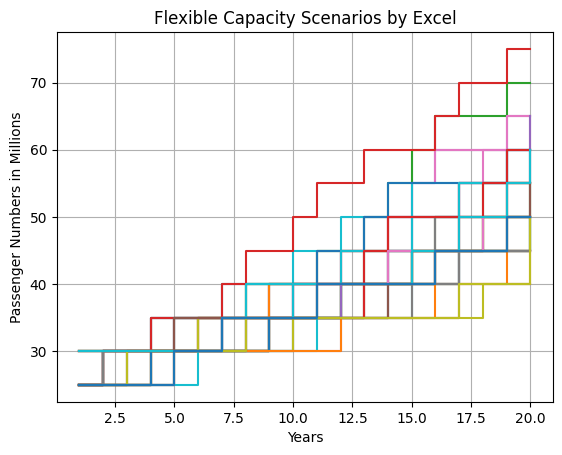

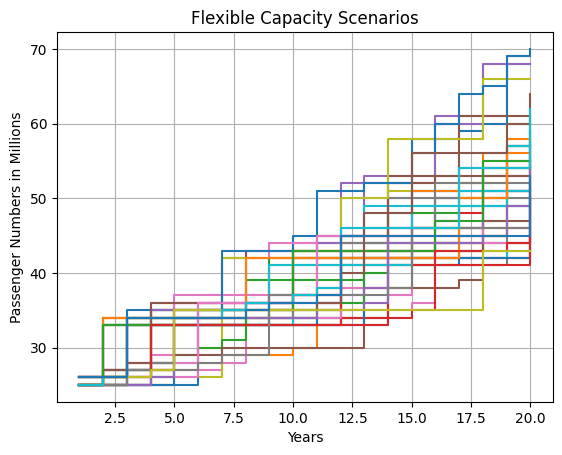

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting the Flexible Capacity Vectors
fn.Scenario_plot(
    Flexible_Capacity_Excel,
    Fth,
    False,
    "Flexible Capacity Scenarios by Excel",
    "Passenger Numbers in Millions",
)

fn.Scenario_plot(
    Flexible_Capacity,
    Fth,
    False,
    "Flexible Capacity Scenarios",
    "Passenger Numbers in Millions",
)

## Calculation of NPV and ENPV using the Flexible Capacity Vector

In [ ]:
Flex_NPV_excel = fn.NPV_Calculation_Fix(
    D_rounded,
    Flexible_Capacity_Excel,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Flexible Excel NPVs = ", Flex_NPV_excel)
# Calculating the ENPV for the Flexible Excel Capacity Vector
Flex_ENPV_excel = np.average(Flex_NPV_excel)
print("\nFlexible Excel ENPV = ", Flex_ENPV_excel)

Flexible Excel NPVs =  [ 9620014.60962474  9907729.49945271  9828220.27649074 ...
 10947872.4816488  10462679.26588051  9591393.83133042]

Flexible Excel ENPV =  9629021.863547675


In [ ]:
# Calling the Flexible NPV Calculation Function
Flex_NPV_est = fn.NPV_Calculation_Fix(
    D_rounded,
    Flexible_Capacity,
    Fth,
    dt,
    th,
    r_D,
    r_K,
    r_K_rent,
    co_K,
    co_D,
    ci_K,
    discount,
    EoS,
)
print("Estimated Flexible Excel NPVs = ", Flex_NPV_est)

# Calculating the ENPV for the Estimated Flexible Capacity Vector
Flex_ENPV_est = np.average(Flex_NPV_est)
print("\nEstimated Flexible ENPV = ", Flex_ENPV_est)

Estimated Flexible Excel NPVs =  [ 9435210.14765589  9959481.20188973  9357094.16951783 ...
 10743465.70764291 10363380.10795713  8996276.91650626]

Estimated Flexible ENPV =  9519781.912797352


Calculating the new ENPV

In [ ]:
print("Traditional ENPV = ", Traditional_ENPV)
print("Flexible ENPV with Excel = ", Flex_ENPV_excel)
print("Flexible ENPV = ", Flex_ENPV_est)
# print("If > 0 => Flexible Excel better -> ", Flex_ENPV_excel / Traditional_ENPV)
# print("If > 0 => Flexible better -> ", Flex_ENPV_est / Traditional_ENPV)

Traditional ENPV =  9787783.459295059
Flexible ENPV with Excel =  9629021.863547675
Flexible ENPV =  9519781.912797352


Plotting Target Curves (Cumulative Density Function)

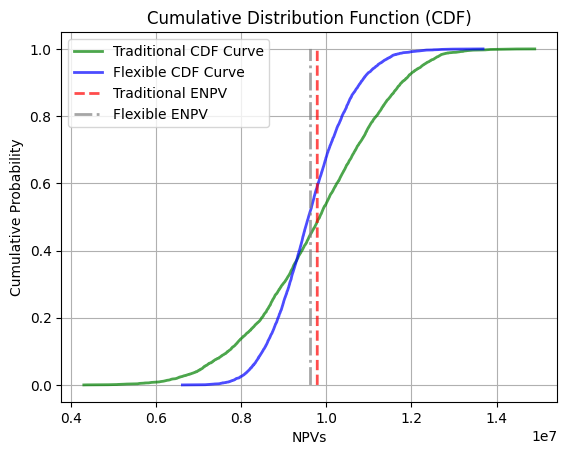

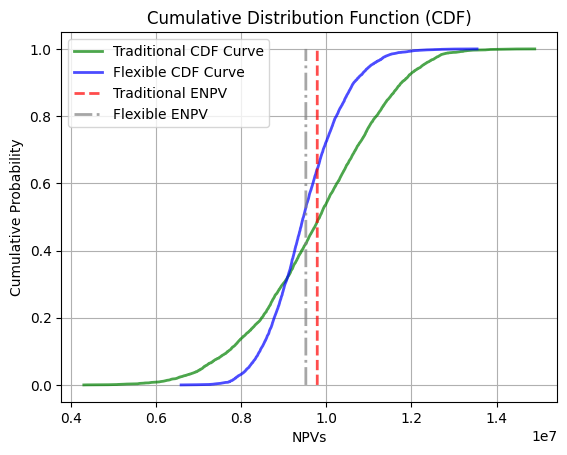

In [ ]:
# Plotting the CDF for the First Decision Rule
fn.CDF_Plot(Traditional_NPV, Flex_NPV_excel)

# Plotting the CDF for the Second Decision Rule
fn.CDF_Plot(Traditional_NPV, Flex_NPV_est)

## Exporting Data

In [ ]:
# Create a DataFrame with names and the result vector
Exportdata = {
    "Traditional NPV": Traditional_NPV,
    "Flexible NPV": Traditional_NPV,
    "Flexible NPV Excel": Flex_NPV_excel,
    "Traditional ENPV": Traditional_ENPV,
    "Flexible ENPV": Flex_ENPV_est,
    "Flexible ENPV Excel": Flex_ENPV_excel,
}

df = pd.DataFrame(Exportdata)

# Export the DataFrame to an Excel file
df.to_excel("NPV_Export.xlsx", index=False)

In [ ]:
end_time = time.time()

# Calculate total run time
total_run_time = end_time - start_time

# Display the total run time
print(total_run_time)

4.236068487167358
